In [9]:
import os
# os.environ['DEVICE_ID'] = '0'
import numpy as np

import mindspore as ms
from mindspore import nn
from mindspore import context
#当前实验选择算力为Ascend，如果在本地体验，参数device_target设置为"CPU”

context.set_context(mode=context.GRAPH_MODE, device_target="Ascend")

x = np.arange(-5, 5, 0.3)[:32].reshape((32, 1))
y = -5 * x +  0.1 * np.random.normal(loc=0.0, scale=20.0, size=x.shape)

net = nn.Dense(1, 1)
loss_fn = nn.loss.MSELoss()
opt = nn.optim.SGD(net.trainable_params(), learning_rate=0.01)
with_loss = nn.WithLossCell(net, loss_fn)
train_step = nn.TrainOneStepCell(with_loss, opt).set_train()

for epoch in range(20):
    loss = train_step(ms.Tensor(x, ms.float32), ms.Tensor(y, ms.float32))
    print('epoch: {0}, loss is {1}'.format(epoch, loss))

epoch: 0, loss is 197.6458
epoch: 1, loss is 141.7493
epoch: 2, loss is 101.95397
epoch: 3, loss is 73.621155
epoch: 4, loss is 53.448586
epoch: 5, loss is 39.085354
epoch: 6, loss is 28.857883
epoch: 7, loss is 21.574745
epoch: 8, loss is 16.38775
epoch: 9, loss is 12.693083
epoch: 10, loss is 10.060879
epoch: 11, loss is 8.185118
epoch: 12, loss is 6.8479385
epoch: 13, loss is 5.89425
epoch: 14, loss is 5.2136326
epoch: 15, loss is 4.72748
epoch: 16, loss is 4.3798294
epoch: 17, loss is 4.130838
epoch: 18, loss is 3.9521432
epoch: 19, loss is 3.8235457


In [7]:
wb = [x.asnumpy() for x in net.trainable_params()]
w, b = np.squeeze(wb[0]), np.squeeze(wb[1])
print('The true linear function is y = -5 * x + 0.1')
print('The trained linear model is y = {0} * x + {1}'.format(w, b))

for i in range(-10, 11, 5):
    print('x = {0}, predicted y = {1}'.format(i, net(ms.Tensor([[i]], ms.float32))))

The true linear function is y = -5 * x + 0.1
The trained linear model is y = -4.732028961181641 * x + 0.14455828070640564
x = -10, predicted y = [[47.464848]]
x = -5, predicted y = [[23.804703]]
x = 0, predicted y = [[0.14455828]]
x = 5, predicted y = [[-23.515587]]
x = 10, predicted y = [[-47.17573]]


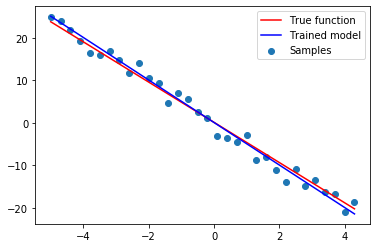

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x, y, label='Samples')
plt.plot(x, w * x +  b, c='r', label='True function')
plt.plot(x, -5 * x +  0.1, c='b', label='Trained model')
plt.legend()